In [14]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

<font size=6> Histogram equaliztion via cv2

In [45]:
def read_RGB_show_gray(name="Lenna.jpg"):
    img = cv2.imread(name)
    grayimg=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    return grayimg

In [98]:
def make_histogram(img=grayimg,show=True):
    histogram=[0]*260
    x=[i for i in range(260)]
    for i in range(len(img)):
        for j in range(len(img[0])):
            scale=img[i][j]
            histogram[scale]+=1
    if show==True:
        plt.bar(x,histogram)
    return histogram

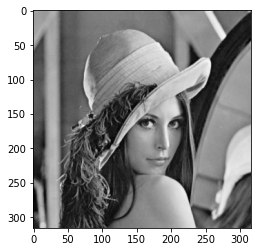

In [46]:
grayimg=read_RGB_show_gray()
plt.imshow(grayimg,cmap="gray")

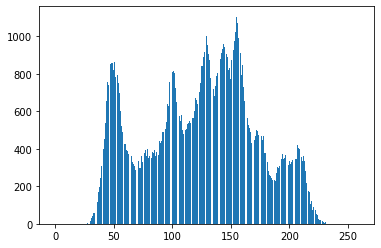

In [23]:
histogram=make_histogram()

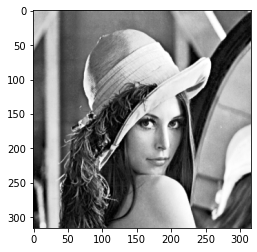

In [53]:
eqimg = cv2.equalizeHist(grayimg)
plt.imshow(eqimg,cmap="gray")

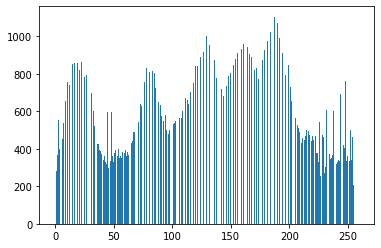

In [89]:
histogram2=make_histogram(img=eqimg)

<font size=6> Comparison

<BarContainer object of 260 artists>

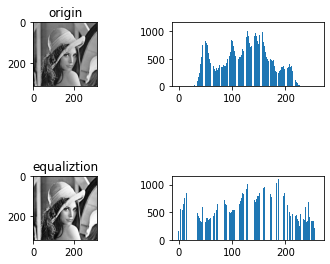

In [38]:
plt.subplot(321),plt.imshow(grayimg,'gray'),plt.title('origin')
plt.subplot(322)
plt.bar([i for i in range(260)],histogram)
plt.subplot(325),plt.imshow(eqimg,'gray'),plt.title('equaliztion')
plt.subplot(326)
plt.bar([i for i in range(260)],histogram2)

<font size=6> Histogram Equalization by myself

In [99]:
def histoeq(img=grayimg):
    eqgrayimg=np.zeros((img.shape[0],img.shape[1]))
    mn=img.shape[0]*img.shape[1]
    original_histo=make_histogram(img,show=False)
    P=0
    cdf=[]
    for scale_num in original_histo:
        P+=scale_num
        cP=P/mn
        cdf.append(cP)
    new_scale=[round(255*chistoscale) for chistoscale in chisto]
    for i in range(len(img)):
        for j in range(len(img[0])):
            eqgrayimg[i][j]=new_scale[img[i][j]]
    eqgrayimg=eqgrayimg.astype(np.int)
    #裡面原本float64記得改int
    return eqgrayimg

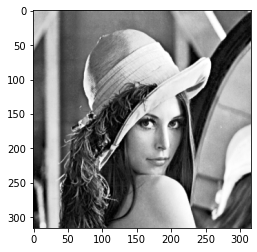

In [101]:
eqgrayimg=histoeq()
plt.imshow(eqgrayimg,cmap="gray")

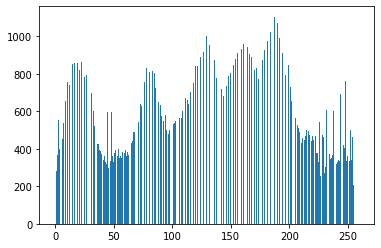

In [92]:
eqhistogram2=make_histogram(img=eqgrayimg)